In [36]:
import numpy as np

# ajuste de matplotlib a parametros esteticos
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
from astropy.utils.data import download_file


In [38]:
from astropy.io import fits


# Manipular imagenes FITS

In [39]:
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

In [40]:
image_file

'/home/angelr/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f'

# Abrir y cargar imagenes de FITS files
abrir el archivo FITS y ver su contenido


In [41]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /home/angelr/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


la informacion para construir la imagen por lo general esta en el bloque PRIMARY

In [42]:
image_data = hdu_list[0].data

In [43]:
hdu_list[0].data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

In [44]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


ahora se puede cerrar el archvo como se haria en unta practica de open with... etc

In [45]:
hdu_list.close()


### método `fits.getdata`


In [47]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


## Ver imagen


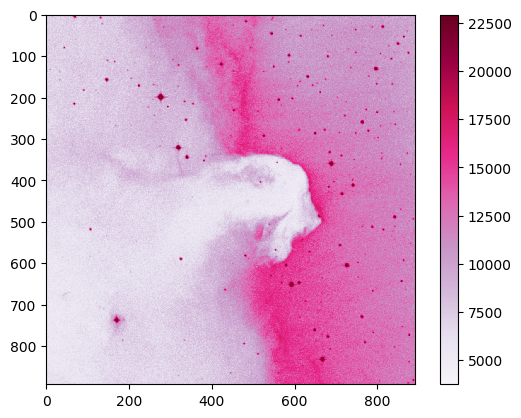

In [48]:
plt.imshow(image_data, cmap='PuRd')
plt.colorbar()


In [14]:
from matplotlib.colors import LogNorm


### Remarcar diferencias con label logaritmico

[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

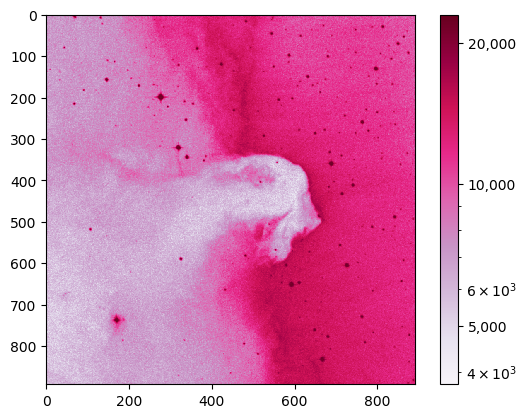

In [16]:
plt.imshow(image_data, cmap='PuRd', norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])